In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('electric.csv')
# df = df.drop(['unnamed'])
# df.columns = ['전기생산량', '전기사용량']
df

,Unnamed: 0,전기생산량,전기사용량
0,0,3.52,2.48
1,1,2.58,2.27
2,2,3.31,2.47
3,3,4.07,2.77
4,4,4.62,2.98
5,5,3.98,3.05
6,6,4.29,3.18
7,7,4.83,3.46
8,8,3.71,3.03
9,9,4.61,3.25


In [19]:
x = tf.placeholder( tf.float32)
y = tf.constant( df['전기사용량'], tf.float32)

In [20]:
w = tf.Variable(tf.random_uniform([1]))
b = tf.Variable(tf.random_uniform([1]))

In [21]:
hx = w*x + b
cost = tf.reduce_mean(tf.square(hx-y))

In [22]:
optimizer = tf.train.GradientDescentOptimizer(0.001) #learning rate
train = optimizer.minimize(cost)

In [23]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [24]:
# hist = []

In [25]:
for i in range(10000):
    sess.run(train,{x:df['전기생산량']})
    if i%100==0:
#         c = sess.run(cost,{x:df['전기생산량']})
#         print(i,c)
#         hist.append(c)
        print(i, sess.run(cost,{x:df['전기생산량']}))

0 0.40355146
100 0.034163933
200 0.033625845
300 0.033542782
400 0.033461068
500 0.03338022
600 0.03330006
700 0.033220746
800 0.033142168
900 0.033064377
1000 0.032987367
1100 0.032911044
1200 0.03283549
1300 0.032760683
1400 0.032686595
1500 0.032613218
1600 0.03254059
1700 0.032468643
1800 0.0323974
1900 0.032326862
2000 0.03225701
2100 0.032187816
2200 0.032119304
2300 0.032051466
2400 0.03198428
2500 0.031917762
2600 0.03185186
2700 0.03178664
2800 0.031722035
2900 0.031658057
3000 0.031594694
3100 0.031531963
3200 0.03146984
3300 0.031408325
3400 0.031347394
3500 0.03128707
3600 0.031227326
3700 0.031168172
3800 0.03110958
3900 0.031051537
4000 0.030994115
4100 0.03093723
4200 0.030880913
4300 0.030825093
4400 0.03076986
4500 0.030715138
4600 0.030660974
4700 0.030607356
4800 0.030554205
4900 0.030501587
5000 0.030449493
5100 0.030397892
5200 0.030346816
5300 0.030296221
5400 0.030246114
5500 0.030196523
5600 0.030147409
5700 0.030098729
5800 0.030050555
5900 0.03000287
6000 0.02

In [26]:
sess.run(w)

array([0.5844107], dtype=float32)

In [27]:
sess.run(b)

array([0.56591856], dtype=float32)

In [28]:
sess.run(hx,{x:[40]})

array([23.942347], dtype=float32)

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\

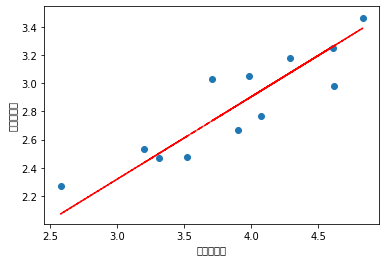

In [29]:
# plt.plot(hist)
# plt.show()
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')
plt.scatter(df['전기생산량'], df['전기사용량'])
plt.plot( df['전기생산량'], sess.run(hx, {x:df['전기생산량']}),'r--')
plt.show()